# **Импорт библиотек**

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=2fbe531ed4ede606fef04f3dce40b6bb5a69780c1d5839d0dd8a4353116877b6
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import numpy as np  
import pandas as pd  
from apyori import apriori  
import matplotlib.pyplot as plt
import time
import csv
import apyori

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Подключение датасетов**

К сожалению, пришлось установить малые значения датасетов,т.к. иначе дальнейшие процессы идут очень долго. Размеры датасетов всегда можно изменить

In [ ]:
with open('/content/drive/MyDrive/OnlineRetail.csv', encoding='windows-1252') as tsvfile:
    retail= pd.read_csv(tsvfile, delimiter=',')


In [ ]:
print(len(retail))
retail = retail.head(100)
print(len(retail))

541909
100


In [ ]:
with open('/content/drive/MyDrive/US_Accidents_Dec21_updated.csv', encoding='windows-1252') as tsvfile:
    accidents= pd.read_csv(tsvfile, delimiter=',')

In [ ]:
print(len(accidents))
accidents = accidents.head(100)
print(len(accidents))

2845342
100


# **Используемые функции**

Установка пороговых значений

In [ ]:
min_supports = [0.003, 0.005, 0.009, 0.01, 0.02]

Выполнение поиска частных наборов

In [ ]:
def apyori_funct(dataset, min_supports):
  result = []
  times = []
  for i in min_supports:
    time_1 = time.time()
    result.append(list(apyori.apriori(dataset, min_support = i, min_length = 2, min_confidence = 0.2, min_lift = 2)))
    time_2 = time.time()
    times.append(time_2 - time_1)
  return result, times

Преобразование датасета в список

In [ ]:
def get_list(data: object) -> list:
  data_list = []
  for i in range(0, len(data)):
    for j in range(0, int(data.size/len(data))):
      data_list.append(str(data.values[i,j]).split())

  return data_list

Вывод результатов

In [ ]:
def results(result, min_supports):
  for i in range(len(result)):
    print(min_supports[i])
    print("<---->")
    for j in range(len(result[i])):
      print("{}, {}".format(result[i][j].items, round(result[i][j].support,4)))
    print("<---->")

Построение графика

In [ ]:
def chart(result, min_supports, times):
  
  support = []
  for i in min_supports:
    support.append(str(i))

  quantity = []
  for i in range(len(result)):
    quantity.append(len(result[i]))

  plt.bar(support, times)
  plt.xlabel("Значение поддержки")
  plt.ylabel("Время работы")
  plt.show()

  plt.bar(support, quantity)
  plt.xlabel("Значение поддержки")
  plt.ylabel("Количество наборов")
  plt.show()

In [ ]:
retail_list = get_list(retail)

In [ ]:
accidents_list = get_list(accidents)

# **Результаты**

0.003
<---->
frozenset({'Accident.', '-'}), 0.0177
frozenset({'At', '-'}), 0.0128
frozenset({'Between', '-'}), 0.0049
frozenset({'Closed', '-'}), 0.0036
frozenset({'Rd/Exit', '-'}), 0.0049
frozenset({'-', 'Road'}), 0.0036
frozenset({'accident.', '-'}), 0.0036
frozenset({'and', '-'}), 0.0079
frozenset({'closed', '-'}), 0.0036
frozenset({'due', '-'}), 0.0036
frozenset({'to', '-'}), 0.0036
frozenset({'Accident.', 'At'}), 0.0128
frozenset({'Accident.', 'Between'}), 0.0049
frozenset({'Accident.', 'Rd/Exit'}), 0.004
frozenset({'and', 'Accident.'}), 0.0049
frozenset({'and', 'Between'}), 0.0049
frozenset({'Closed', 'Road'}), 0.0036
frozenset({'Closed', 'accident.'}), 0.0036
frozenset({'closed', 'Closed'}), 0.0036
frozenset({'due', 'Closed'}), 0.0036
frozenset({'to', 'Closed'}), 0.0036
frozenset({'Snow', 'Light'}), 0.0113
frozenset({'accident.', 'Road'}), 0.0036
frozenset({'closed', 'Road'}), 0.0036
frozenset({'due', 'Road'}), 0.0036
frozenset({'to', 'Road'}), 0.0036
frozenset({'closed', 'accid

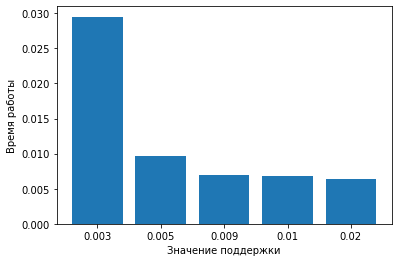

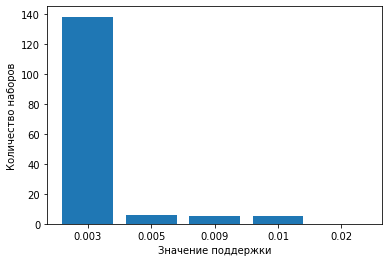

In [ ]:
result, times = apyori_funct(accidents_list, min_supports)
results(result, min_supports)
chart(result, min_supports, times)

0.003
<---->
frozenset({'12/1/2010', '8:26'}), 0.0088
frozenset({'8:34', '12/1/2010'}), 0.02
frozenset({'12/1/2010', '8:45'}), 0.025
frozenset({'9:02', '12/1/2010'}), 0.02
frozenset({'9:32', '12/1/2010'}), 0.0225
frozenset({'12/1/2010', '9:37'}), 0.0175
frozenset({'60', 'CAKE'}), 0.0037
frozenset({'60', 'CASES'}), 0.0037
frozenset({'BABUSHKA', '7'}), 0.0037
frozenset({'7', 'BOXES'}), 0.0037
frozenset({'NESTING', '7'}), 0.0037
frozenset({'7', 'SET'}), 0.0037
frozenset({'ALARM', 'BAKELIKE'}), 0.0037
frozenset({'ALARM', 'CLOCK'}), 0.0037
frozenset({'BABUSHKA', 'BOXES'}), 0.0037
frozenset({'NESTING', 'BABUSHKA'}), 0.0037
frozenset({'BABUSHKA', 'SET'}), 0.0037
frozenset({'JUMBO', 'BAG'}), 0.0037
frozenset({'CLOCK', 'BAKELIKE'}), 0.0037
frozenset({'BILLBOARD', 'MUG'}), 0.005
frozenset({'BILLBOARD', 'VINTAGE'}), 0.005
frozenset({'BLOCK', 'BUILDING'}), 0.0037
frozenset({'BLOCK', 'WORD'}), 0.0037
frozenset({'FLAG', 'BOTTLE'}), 0.0037
frozenset({'HOT', 'BOTTLE'}), 0.005
frozenset({'BOTTLE', 'KNI

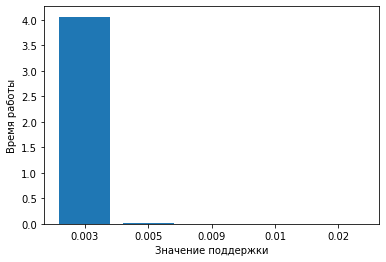

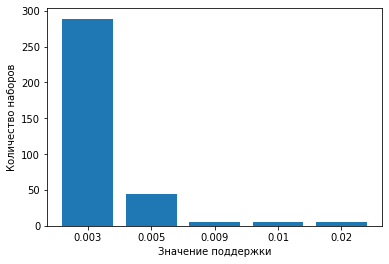

In [ ]:
result, times = apyori_funct(retail_list, min_supports)
results(result, min_supports)
chart(result, min_supports, times)